In [1]:
x1, x2, x3, x4 = var('x1 x2 x3 x4', domain='real')
y1, y2, y3, y4 = var('y1 y2 y3 y4', domain='real')
z1, z2, z3, z4 = var('z1 z2 z3 z4', domain='real')

p1 = vector((x1, y1, z1))
p2 = vector((x2, y2, z2))
p3 = vector((x3, y3, z3))
p4 = vector((x4, y4, z4))

e1 = p2-p1
e2 = p3-p1
e3 = p4-p1

n1 = e1.cross_product(e2)
n2 = e3.cross_product(e1)

In [2]:
tan_theta = n1.cross_product(n2).norm() / (n1*n2)
theta = atan2(n2.cross_product(n1).norm(), n1*n2)

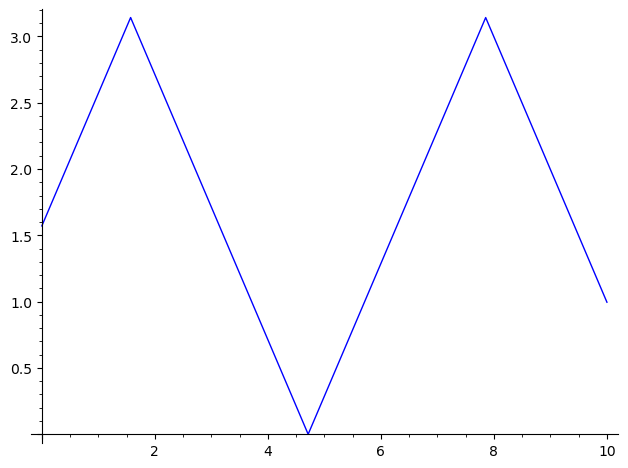

In [3]:
psi = var('psi')
plot(theta.subs({x1:0,y1:0,z1:0, x2:1,y2:0,z2:0, x3:1,y3:1,z3:0, x4:0,y4:sin(psi),z4:cos(psi)}), (psi, 0, 10))

In [4]:
e_bar = var('e_bar')
theta_bar = var('theta_bar')
h_bar = var('h_bar')

E = (theta - theta_bar) * (theta -theta_bar) * e_bar / h_bar

In [7]:
from sympy.utilities.codegen import codegen
from sympy.simplify.cse_main import cse
from sympy.printing.pycode import pycode
from sympy.printing import ccode

vars = [x1, y1, z1, x2, y2, z2, x3, y3, z3, x4, y4, z4]


In [11]:
indexed_hessian = ['d' + pycode(i) + pycode(j) for i in vars for j in vars]
hessian = [E.diff(i).diff(j)._sympy_() for i in vars for j in vars]
lhs, rhs = cse(hessian)

In [15]:
f = open("flex_H.py", "w")
f.write("\
import taichi as ti\n\
import taichi.math as math\n\
@ti.func\n\
def flex_H(x1, y1, z1, x2, y2, z2, x3, y3, z3, x4, y4, z4, e_bar, theta_bar, h_bar):\n\
")
for v, t in lhs:
    f.write(' ' + pycode(v) + ' = ' + pycode(t) + '\n')
for idx, (v, t) in enumerate(zip(indexed_hessian, rhs)):
    f.write(' ' + v+ ' = ' + pycode(t) + '\n')

f.write(" return ")
for v in indexed_hessian:
    f.write( v + ', ')
f.close()

In [13]:
indexed_jacobian = ['d' + pycode(i) for i in vars]
jacobian = [E.diff(i)._sympy_() for i in vars]
lhs, rhs = cse(jacobian)

In [14]:
f = open("flex_J.py", "w")
f.write("\
import taichi as ti\n\
import taichi.math as math\n\
@ti.func\n\
def flex_J(x1, y1, z1, x2, y2, z2, x3, y3, z3, x4, y4, z4, e_bar, theta_bar, h_bar):\n\
")
for v, t in lhs:
    f.write(' ' + pycode(v) + ' = ' + pycode(t) + '\n')
for v, t in zip(indexed_jacobian, rhs):
    f.write(' ' +v + ' = ' + pycode(t) + '\n')
f.write(" return ")
for v in indexed_jacobian:
    f.write(v + ', ')
f.close()

## Edge length membrane energy

In [16]:
E= (1- e1.norm()/e_bar)**2 * e_bar
vars = [x1, y1, z1, x2, y2, z2]
pretty_print(E)

e_bar*(sqrt((x1 - x2)^2 + (y1 - y2)^2 + (z1 - z2)^2)/e_bar - 1)^2

In [17]:
indexed_hessian = ['d' + pycode(i) + pycode(j) for i in vars for j in vars]
hessian = [E.diff(i).diff(j)._sympy_() for i in vars for j in vars]
lhs, rhs = cse(hessian)

In [18]:
f = open("edge_H.py", "w")
f.write("\
import taichi as ti\n\
import taichi.math as math\n\
@ti.func\n\
def edge_H(x1, y1, z1, x2, y2, z2, e_bar):\n\
")
for v, t in lhs:
    f.write(' ' + pycode(v) + ' = ' + pycode(t) + '\n')
for idx, (v, t) in enumerate(zip(indexed_hessian, rhs)):
    f.write(' ' + v+ ' = ' + pycode(t) + '\n')

f.write(" return ")
for v in indexed_hessian:
    f.write( v + ', ')
f.close()

In [19]:
indexed_jacobian = ['d' + pycode(i) for i in vars]
jacobian = [E.diff(i)._sympy_() for i in vars]
lhs, rhs = cse(jacobian)

In [21]:
f = open("edge_J.py", "w")
f.write("\
import taichi as ti\n\
import taichi.math as math\n\
@ti.func\n\
def edge_J(x1, y1, z1, x2, y2, z2, e_bar) -> ti.types.vector(6, float):\n\
")
for v, t in lhs:
    f.write(' ' + pycode(v) + ' = ' + pycode(t) + '\n')
for v, t in zip(indexed_jacobian, rhs):
    f.write(' ' +v + ' = ' + pycode(t) + '\n')
f.write(" return ")
for v in indexed_jacobian:
    f.write(v + ', ')
f.close()

## Area membrane energy

In [ ]:
A_bar = var('A_bar')
A = n1.norm()/2
E = (1 - A/A_bar)**2 * A_bar
vars = [x1,y1,z1, x2,y2,z2, x3,y3,z3]
pretty_print(E)

In [ ]:
indexed_hessian = ['d' + pycode(i) + pycode(j) for i in vars for j in vars]
hessian = [E.diff(i).diff(j)._sympy_() for i in vars for j in vars]
lhs, rhs = cse(hessian)

In [ ]:
f = open("area_H.py", "w")
f.write("\
import taichi as ti\n\
import taichi.math as math\n\
@ti.func\n\
def area_H(x1, y1, z1, x2, y2, z2, x3, y3,z3, A_bar):\n\
")
for v, t in lhs:
    f.write(' ' + pycode(v) + ' = ' + pycode(t) + '\n')
for idx, (v, t) in enumerate(zip(indexed_hessian, rhs)):
    f.write(' ' + v+ ' = ' + pycode(t) + '\n')

f.write(" return ")
for v in indexed_hessian:
    f.write( v + ', ')
f.close()

In [ ]:
indexed_jacobian = ['d' + pycode(i) for i in vars]
jacobian = [E.diff(i)._sympy_() for i in vars]
lhs, rhs = cse(jacobian)

In [ ]:
f = open("area_J.py", "w")
f.write("\
import taichi as ti\n\
import taichi.math as math\n\
@ti.func\n\
def area_J(x1, y1, z1, x2, y2, z2, x3, y3,z3, A_bar):\n\
")
for v, t in lhs:
    f.write(' ' + pycode(v) + ' = ' + pycode(t) + '\n')
for v, t in zip(indexed_jacobian, rhs):
    f.write(' ' +v + ' = ' + pycode(t) + '\n')
f.write(" return ")
for v in indexed_jacobian:
    f.write(v + ', ')
f.close()